In [8]:
library(dplyr)
library(ggplot2)
library(tidyr)

In [40]:
chromosomeLength=read.table("./Chromsome_cumulate_length.txt")
colnames(chromosomeLength)=c("Chrom","len")
head(chromosomeLength)

,Chrom,len
,<fct>,<dbl>
1,Ghir_A01,0
2,Ghir_A02,117757855
3,Ghir_A03,225849955
4,Ghir_A04,338909367
5,Ghir_A05,424059177
6,Ghir_A06,533478787


In [84]:
#* SNP index long pool中与ZY043相同比例减去short中ZY043比例
BSAratio=read.table("./BSA_ratio_V2.txt",header=T)
BSAratio=merge(BSAratio,chromosomeLength,by=c("Chrom"))
BSAratio=BSAratio %>% mutate(windowStart=start+len)

In [91]:
#---------------------------------------------------
#* D02 染色体与D11染色体在染色体上的分布
#? D11的坐标需要减去D02最末尾的坐标：
#---------------------------------------------------
D02Data=BSAratio %>% filter(Chrom=="Ghir_D02")
D11Data=BSAratio %>% filter(Chrom=="Ghir_D11") %>% mutate(windowStart=start+1546618173)
plotData=rbind(D02Data,D11Data)

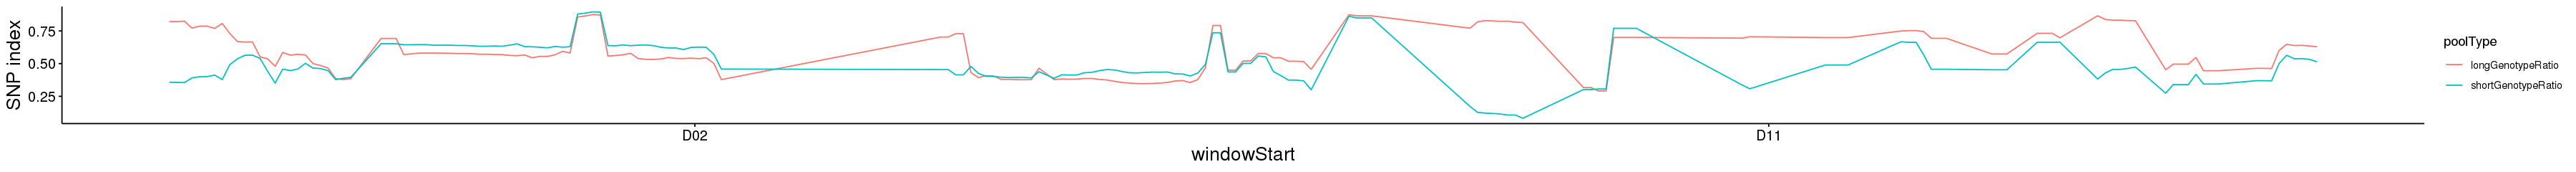

In [99]:
#* 对于SNP数目小于10个的窗口进行过滤, 并且加上累积染色体长度
options(repr.plot.width=30,repr.plot.height=2)
plotData %>%
    filter(SNPCount >= 5) %>%
    # filter(Chrom %in% c('Ghir_D02',"Ghir_D11")) %>% 
    pivot_longer(
        cols = c("longGenotypeRatio", "shortGenotypeRatio"),
        values_to = "ratio",
        names_to = "poolType"
    ) %>%
    ggplot(
        aes(x = windowStart, y = ratio, color = poolType)
    ) +
    geom_line(
        aes(group = poolType)
    )+
    theme_classic()+
    scale_x_continuous(
        breaks = c(1511868172,1582868173),
        labels = c("D02","D11")
    )+
    ylab("SNP index")+
    base_theme

In [100]:
#------------------------------------------------
#* SNP Index
#------------------------------------------------
BSAratio=BSAratio %>% mutate(SNPdiff = longGenotypeRatio - shortGenotypeRatio)
BSAratio$binId=seq(1,dim(BSAratio)[1])
bootstrapRatio=read.table("bootstrap_SNPratio_V3.txt",header=T)
bootstrapRatio$binId=seq(1,dim(bootstrapRatio)[1])
bootstrapRatio=bootstrapRatio %>% select(c(lowVal,binId,highVal))
MergeData=merge(BSAratio, bootstrapRatio, by = c("binId"))

In [104]:
bootstrapD02=MergeData %>% filter(Chrom=="Ghir_D02")
bootstrapD11=MergeData %>% filter(Chrom=="Ghir_D11")%>% mutate(windowStart=start+1546618173)
plotData=rbind(bootstrapD02,bootstrapD11)
head(plotData)

,binId,Chrom,start,end,SNPCount,longGenotypeRatio,shortGenotypeRatio,len,windowStart,SNPdiff,lowVal,highVal
,<int>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2960,Ghir_D02,0,2000000,2295,0.8212157,0.3578521,1477118172,1477118172,0.4633637,0.1457473,0.3153644
2,2961,Ghir_D02,500000,2500000,2345,0.8218294,0.3561569,1477118172,1477618172,0.4656725,0.1423062,0.3121459
3,2962,Ghir_D02,1000000,3000000,3328,0.8247222,0.3550818,1477118172,1478118172,0.4696404,0.1413784,0.3267260
4,2963,Ghir_D02,1500000,3500000,2814,0.7710025,0.3907859,1477118172,1478618172,0.3802165,0.1301015,0.2607354
5,2964,Ghir_D02,2000000,4000000,3919,0.7865819,0.3997414,1477118172,1479118172,0.3868405,0.1249909,0.2747085
6,2965,Ghir_D02,2500000,4500000,4092,0.7867472,0.4005542,1477118172,1479618172,0.3861930,0.1242478,0.2703648


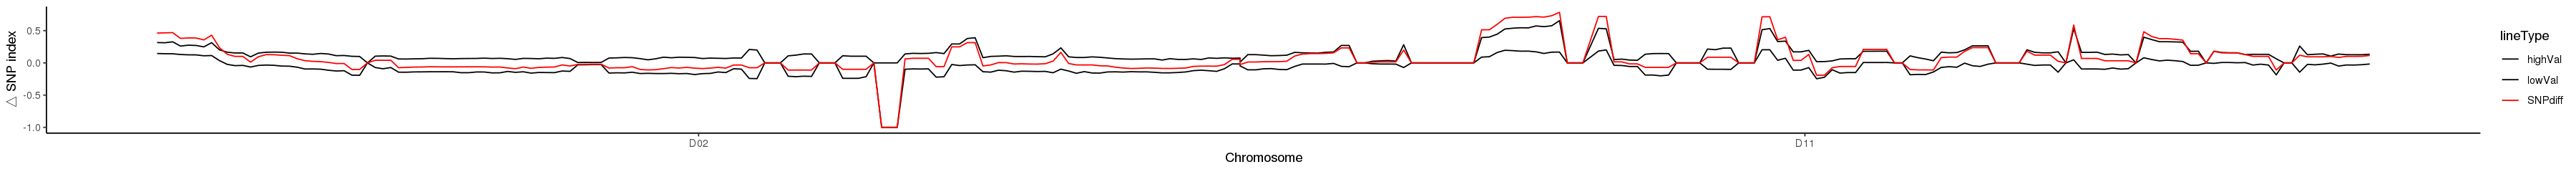

In [106]:
p=plotData %>%
    pivot_longer(
        cols = c("lowVal", "highVal", "SNPdiff"),
        values_to = "ratio",
        names_to = "lineType"
    ) %>%
    ggplot(
        aes(x = windowStart, y = ratio, color = lineType, group = lineType)
    ) +
    geom_line(
        aes(group = lineType)
    ) +
    scale_x_continuous(
        breaks = c(1511868172, 1582868173),
        labels = c("D02", "D11")
    ) +
    scale_color_manual(
        values = c("black", "black", "red")
    ) +
    theme_classic() +
    ylab("△ SNP index") +
    xlab("Chromosome")
p

In [107]:
#--------------------------------------------------------------
#TODO 初始版本
#! 统计区间内SNP与亲本相似的比例统计，最后对pool内所有的样本求平均值 (这里没有用MAF对vcf文件进行过滤)
#? 分析区间SNP ratio在D02和D11之间的变化
#--------------------------------------------------------------
BiasRatio_V1=read.table("./BSA_ratio_V1.txt",header = T)

In [119]:

D11_bias_ratio=BiasRatio_V1 %>% filter(Chrom=="Ghir_D11")
D02_bias_ratio=D02_bias_ratio %>% mutate(windowStart=start)
D11_bias_ratio=D11_bias_ratio %>% mutate(windowStart=start+69838496)
plotData=rbind(D02_bias_ratio,D11_bias_ratio)

In [155]:
#------------------------------------
#! GWAS QTL区间
#? D02区间 D02:1528593-2923419: 对应window: 1600000-1800000
#? D11区间 D11:18020028-24580574 对应window 88038496-93238496
#? D11区间 D11:59992058-61000000 对应window 129638496-129838496
#------------------------------------
D02_bias_ratio %>% filter(start>=1528593 & end<2923419)
D11_bias_ratio %>% filter(start>=18020028 & end<24580574)
D11_bias_ratio %>% filter(start>=59000000 & end<=61000000)

Chrom,start,end,SNPCount,longGenotypeRatio,shortGenotypeRatio,windowStart
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
Ghir_D02,1600000,2600000,954,0.7879245,0.4048847,1600000
Ghir_D02,1800000,2800000,2024,0.8749407,0.6366206,1800000


Chrom,start,end,SNPCount,longGenotypeRatio,shortGenotypeRatio,windowStart
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Ghir_D11,18200000,19200000,147,0.8228571,0.44408163,88038496
Ghir_D11,18400000,19400000,188,0.8485106,0.48617021,88238496
Ghir_D11,18600000,19600000,558,0.9253763,0.73200717,88438496
Ghir_D11,18800000,19800000,569,0.9271353,0.73690685,88638496
Ghir_D11,19000000,20000000,509,0.9572888,0.83850688,88838496
Ghir_D11,19200000,20200000,490,0.9565306,0.84359184,89038496
Ghir_D11,19400000,20400000,469,0.9584648,0.86217484,89238496
Ghir_D11,19600000,20600000,97,0.9268041,0.87092784,89438496
Ghir_D11,19800000,20800000,76,0.9173684,0.85315789,89638496


Chrom,start,end,SNPCount,longGenotypeRatio,shortGenotypeRatio,windowStart
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Ghir_D11,59000000,60000000,22,0.8481818,0.6563636,128838496
Ghir_D11,59200000,60200000,248,0.9808065,0.9541935,129038496
Ghir_D11,59400000,60400000,260,0.9790000,0.9344615,129238496
Ghir_D11,59600000,60600000,422,0.9198578,0.7524171,129438496
Ghir_D11,59800000,60800000,458,0.9241485,0.7696943,129638496
Ghir_D11,60000000,61000000,670,0.9515821,0.8520597,129838496


png 
  2

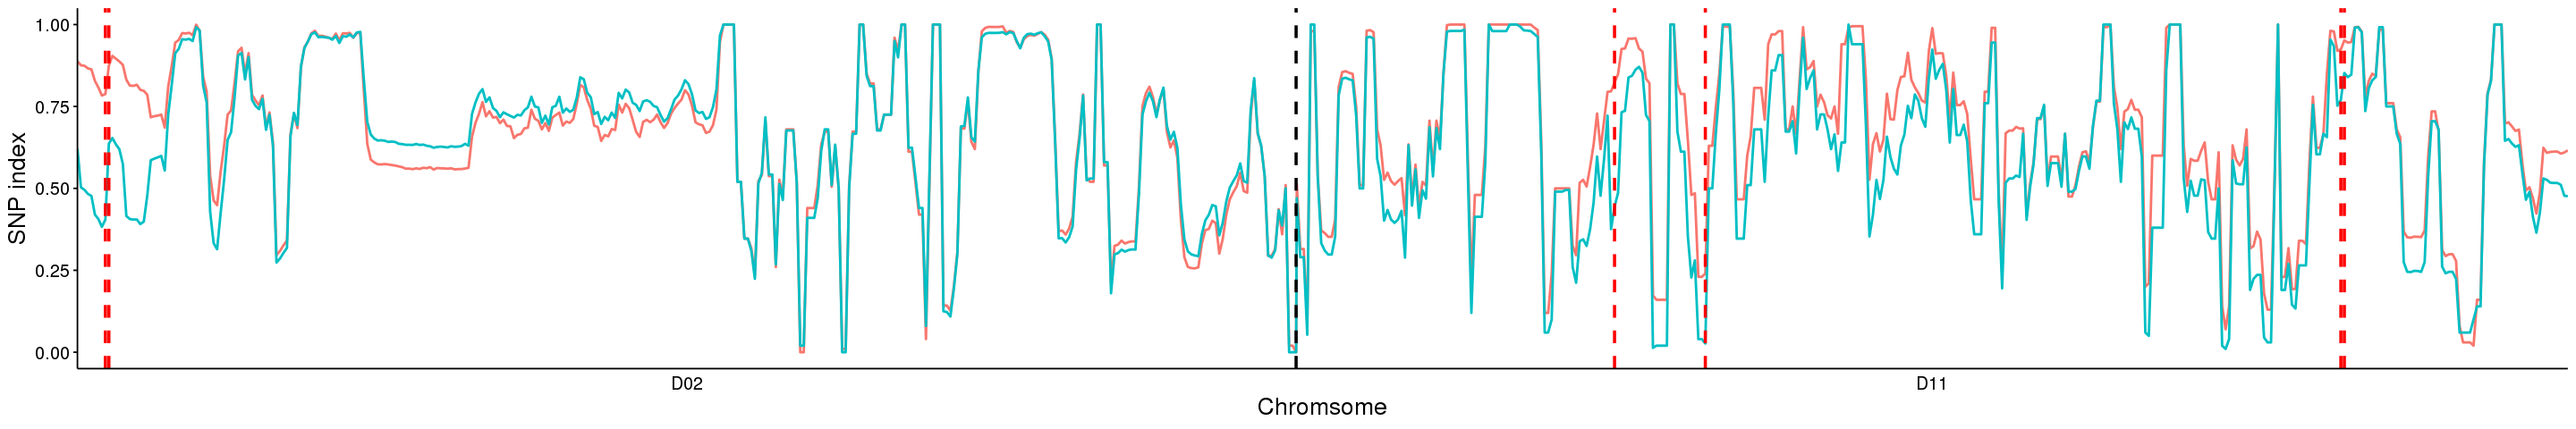

In [163]:
options(repr.plot.width=24,repr.plot.height=4)
p=plotData %>%
    pivot_longer(
        cols = c("longGenotypeRatio", "shortGenotypeRatio"),
        values_to = "ratio",
        names_to = "poolType"
    ) %>%
    ggplot(
        aes(x = windowStart, y = ratio, color = poolType)
    ) +
    geom_line(
        aes(group = poolType),
        size=0.8
    ) +
    scale_x_continuous(
        expand = c(0, 0),
        breaks = c(34900000, 106238496),
        labels = c("D02", "D11")
    ) +
    geom_vline(xintercept = 69800000, linetype = 2,size=1) +
    geom_vline(xintercept = 1600000, linetype = 2,size=1,color='red') +
    geom_vline(xintercept = 1800000, linetype = 2,size=1,color='red') +
    geom_vline(xintercept = 88038496, linetype = 2,size=1,color='red') +
    geom_vline(xintercept = 93238496, linetype = 2,size=1,color='red') +
    geom_vline(xintercept = 129638496, linetype = 2,size=1,color='red') +
    geom_vline(xintercept = 129838496, linetype = 2,size=1,color='red') +
    theme_classic() +
    base_theme+
    xlab("Chromsome")+
    ylab("SNP index")+
    theme(
        legend.position = 'None',
        axis.ticks.x = element_blank()
        )
pdf("SNP_index_pool.pdf",width = 24,height = 4)
print(p)
dev.off()
p

In [185]:
#------------------------------------------------------
#TODO 绘制△SNP index
#? 长池减去短池的结果
#------------------------------------------------------
BiasRatio_V1=read.table("./BSA_ratio_V1.txt",header = T)
D11_bias_ratio=BiasRatio_V1 %>% filter(Chrom=="Ghir_D11")
D02_bias_ratio=D02_bias_ratio %>% mutate(windowStart=start)
D11_bias_ratio=D11_bias_ratio %>% mutate(windowStart=start+69838496)
plotData=rbind(D02_bias_ratio,D11_bias_ratio)
plotData= plotData %>% mutate(readlData=longGenotypeRatio-shortGenotypeRatio)
plotData$windowId=seq(1,dim(plotData)[1])
bootstrapData=read.table("./bootstrap_SNPratio_V1.txt",header=T)
bootstrapData=bootstrapData %>% filter(Chrom %in% c("Ghir_D02","Ghir_D11"))
bootstrapData$windowId=seq(1,dim(bootstrapData)[1])
bootstrapData=bootstrapData %>% select(c("windowId","lowVal","highVal"))
MergeData=merge(plotData,bootstrapData,on=c("windowId"))
head(MergeData)

,windowId,Chrom,start,end,SNPCount,longGenotypeRatio,shortGenotypeRatio,windowStart,readlData,lowVal,highVal
,<int>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Ghir_D02,0,1000000,316,0.8879114,0.6210759,0e+00,0.2668354,0.07088608,0.1989873
2,2,Ghir_D02,200000,1200000,1186,0.8756492,0.5032209,2e+05,0.3724283,0.11291737,0.2625632
3,3,Ghir_D02,400000,1400000,1683,0.8741889,0.4957338,4e+05,0.3784551,0.11327392,0.2662864
4,4,Ghir_D02,600000,1600000,1926,0.8662201,0.4831049,6e+05,0.3831153,0.12505711,0.2721703
5,5,Ghir_D02,800000,1800000,1972,0.8632657,0.4770081,8e+05,0.3862576,0.11601420,0.2682150
6,6,Ghir_D02,1000000,2000000,2405,0.8280416,0.4201414,1e+06,0.4079002,0.11989189,0.2664183


png 
  2

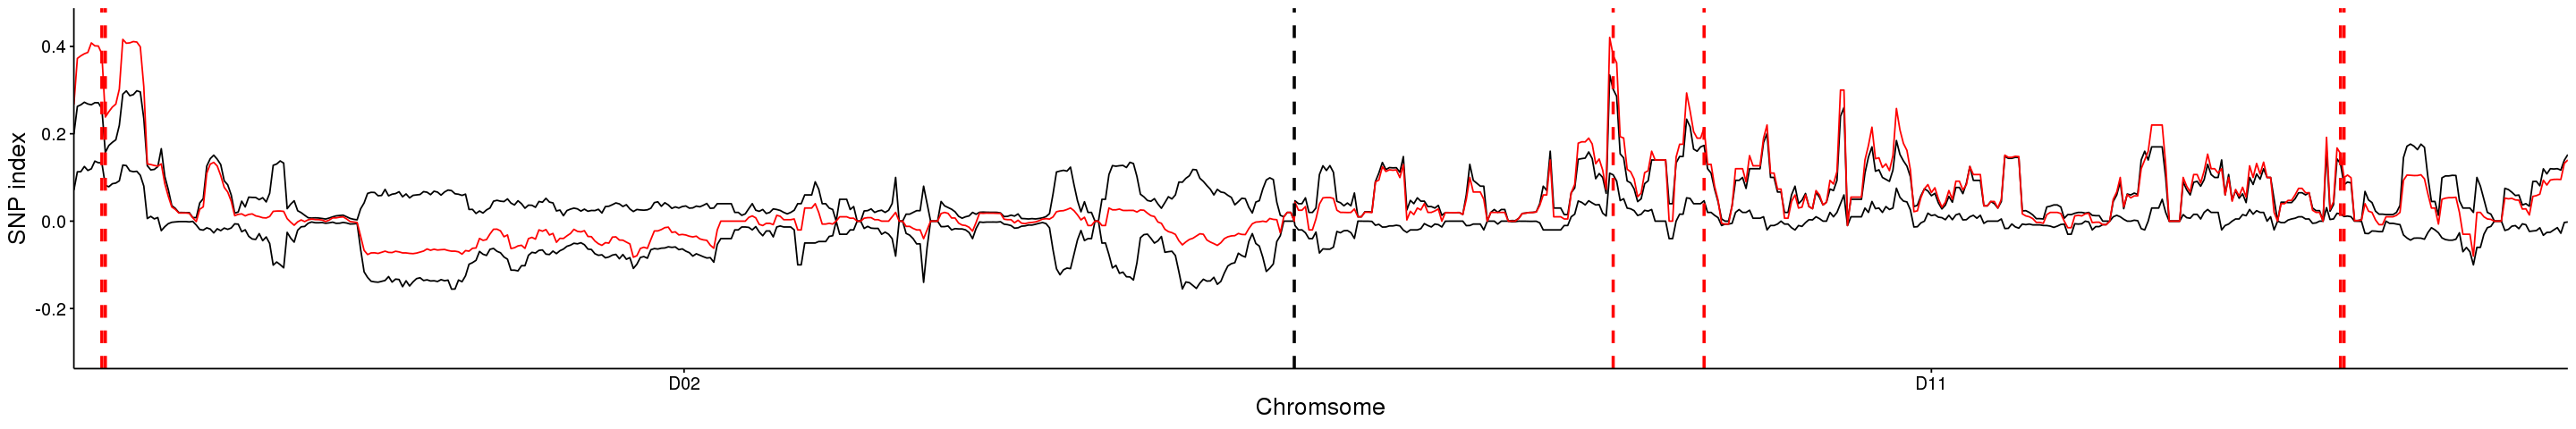

In [194]:
p=MergeData %>%
    pivot_longer(
        cols = c(readlData, lowVal, highVal),
        names_to = "lineType",
        values_to = "SNP_diff"
    ) %>%
    ggplot(
        aes(x = windowStart, y = SNP_diff, color = lineType, group = lineType)
    ) +
    geom_line(
        aes(group = lineType)
    )+
    scale_x_continuous(
        expand = c(0, 0),
        breaks = c(34900000, 106238496),
        labels = c("D02", "D11")
    ) +
    geom_vline(xintercept = 69800000, linetype = 2,size=1) +
    geom_vline(xintercept = 1600000, linetype = 2,size=1,color='red') +
    geom_vline(xintercept = 1800000, linetype = 2,size=1,color='red') +
    geom_vline(xintercept = 88038496, linetype = 2,size=1,color='red') +
    geom_vline(xintercept = 93238496, linetype = 2,size=1,color='red') +
    geom_vline(xintercept = 129638496, linetype = 2,size=1,color='red') +
    geom_vline(xintercept = 129838496, linetype = 2,size=1,color='red') +
    theme_classic() +
    base_theme+
    scale_color_manual(
        values = c("black","black","red")
    )+
    theme(
        legend.position = "None"
    )+
    scale_y_continuous(
        limits = c(-0.3,0.45)
    )+
    xlab("Chromsome")+
    ylab("SNP index")
pdf("SNP_index_diff_pool.pdf",width = 24,height = 4)
print(p)
dev.off()
p